# <b>Simple EDA - Sales and Customer Patterns</b>
https://www.kaggle.com/code/kabure/simple-eda-sales-and-customer-patterns/input?select=olist_orders_dataset.csv


## <b>Preprocessing</b>

### Load dataset

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
order_df = pd.read_csv('olist_orders_dataset.csv') # 주문

print(f'주문 데이터 개수: {len(order_df)}')
order_df.head(1)

주문 데이터 개수: 99441


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00


In [11]:
order_items_df = pd.read_csv('olist_order_items_dataset.csv') # 주문 상세

print(f'상세 주문 데이터 개수: {len(order_items_df)}')
order_items_df.head(1)

상세 주문 데이터 개수: 112650


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29


In [12]:
# example
order_items_df[order_items_df['order_id']=='cd51709c98c738351915f79c4318675e'] # 상품 7개 주문

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
90414,cd51709c98c738351915f79c4318675e,1,3bb3e5caf47c7e92ed97227247e942a8,7d456afc660226829370f3173d14520c,2018-02-05 16:31:18,320.0,25.69
90415,cd51709c98c738351915f79c4318675e,2,e9b3cf27d68caa64832c4a7c460abcb9,7d456afc660226829370f3173d14520c,2018-02-05 16:31:18,160.0,33.02
90416,cd51709c98c738351915f79c4318675e,3,3bb3e5caf47c7e92ed97227247e942a8,7d456afc660226829370f3173d14520c,2018-02-05 16:31:18,320.0,25.69
90417,cd51709c98c738351915f79c4318675e,4,3ebbc0870d51b62783c45e0e61ccb78d,7d456afc660226829370f3173d14520c,2018-02-05 16:31:18,52.0,38.54
90418,cd51709c98c738351915f79c4318675e,5,3ebbc0870d51b62783c45e0e61ccb78d,7d456afc660226829370f3173d14520c,2018-02-05 16:31:18,52.0,38.54
90419,cd51709c98c738351915f79c4318675e,6,e9b3cf27d68caa64832c4a7c460abcb9,7d456afc660226829370f3173d14520c,2018-02-05 16:31:18,160.0,33.02
90420,cd51709c98c738351915f79c4318675e,7,3ebbc0870d51b62783c45e0e61ccb78d,7d456afc660226829370f3173d14520c,2018-02-05 16:31:18,52.0,38.54


### Check the number of order_id

In [19]:
print(order_df['order_id'].nunique())
print(order_items_df['order_id'].nunique())

99441
98666


In [20]:
# order_df에만 있는 order_id를 데이터프레임으로 만들기기
missing_in_order_items = order_df[~order_df['order_id'].isin(order_items_df['order_id'])]

print("order_items_df에 없는 order_id 정보:")
missing_in_order_items['order_status'].value_counts() # 775개

order_items_df에 없는 order_id 정보:


unavailable    603
canceled       164
created          5
invoiced         2
shipped          1
Name: order_status, dtype: int64

### Merge data & Select columns

In [23]:
total_order_df = pd.merge(order_df, order_items_df, on='order_id', how='left')

print(len(total_order_df))
total_order_df.head()

113425


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,1.0,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72


In [8]:
df = total_order_df[['order_id', 'customer_id', 'order_item_id', 'order_status', 
                              'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 
                              'order_delivered_customer_date', 'order_estimated_delivery_date', 'shipping_limit_date']]

## <b>Shipping & Delivery process</b>
주문 완료(order_purchase_timestamp) -> 결제 승인(order_approved_at)  
-> 물류 전달(order_delivered_carrier_date) vs 출고 마감일(shipping_limit_date)  
-> 고객 수령(order_delivered_customer_date) vs 예상 배송일(order_estimated_delivery_date)

In [10]:
# df[['order_status', 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date',
    'shipping_limit_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']]

IndentationError: unexpected indent (3088769749.py, line 2)

In [11]:
shipping_df = df[['order_status','order_purchase_timestamp','order_approved_at',
                  'order_delivered_carrier_date','shipping_limit_date',
                  'order_delivered_customer_date','order_estimated_delivery_date']]

In [12]:
shipping_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column                         Non-Null Count   Dtype 
---  ------                         --------------   ----- 
 0   order_status                   112650 non-null  object
 1   order_purchase_timestamp       112650 non-null  object
 2   order_approved_at              112635 non-null  object
 3   order_delivered_carrier_date   111456 non-null  object
 4   shipping_limit_date            112650 non-null  object
 5   order_delivered_customer_date  110196 non-null  object
 6   order_estimated_delivery_date  112650 non-null  object
dtypes: object(7)
memory usage: 6.9+ MB


#### Check Null value

In [228]:
shipping_df[shipping_df['order_approved_at'].isnull()] # 결제 승인의 null 값은 분석에 영향을 미치지 않으므로 유지

,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,shipping_limit_date
5971,delivered,2017-02-18 14:40:00,NaN,2017-02-23 12:04:47,2017-02-22 13:40:00
18732,delivered,2017-02-18 12:45:31,NaN,2017-02-23 09:01:52,2017-02-22 11:45:31
21512,delivered,2017-02-18 13:29:47,NaN,2017-02-22 16:25:25,2017-02-22 12:29:47
25620,delivered,2017-02-18 16:48:35,NaN,2017-02-22 11:23:10,2017-02-22 15:48:35
26180,delivered,2017-02-17 13:05:55,NaN,2017-02-22 11:23:11,2017-02-21 12:05:55
30328,delivered,2017-01-19 12:48:08,NaN,2017-01-25 14:56:50,2017-01-23 12:48:08
43338,delivered,2017-02-19 01:28:47,NaN,2017-02-23 03:11:48,2017-02-26 01:28:47
44516,delivered,2017-02-18 11:04:19,NaN,2017-02-23 07:23:36,2017-02-25 10:04:19
54770,delivered,2017-01-19 22:26:59,NaN,2017-01-27 11:08:05,2017-01-29 22:26:59
69806,delivered,2017-02-17 17:21:55,NaN,2017-02-22 11:42:51,2017-02-21 16:21:55


In [229]:
shipping_df[shipping_df['order_delivered_carrier_date'].isnull()] # 물류 전달일이 없으므로 drop

,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,shipping_limit_date
6,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaN,2017-04-19 13:25:17
118,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaN,2018-08-13 06:15:14
148,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaN,2017-09-20 14:30:09
368,processing,2016-10-05 22:44:13,2016-10-06 15:51:05,NaN,2016-10-21 16:24:45
447,canceled,2018-08-04 14:29:27,2018-08-07 04:10:26,NaN,2018-08-14 04:10:26
...,...,...,...,...,...
112224,invoiced,2018-07-16 13:20:06,2018-07-16 13:30:35,NaN,2018-07-20 13:30:24
112308,processing,2017-12-26 21:56:13,2017-12-26 22:05:26,NaN,2018-01-02 22:05:26
112317,canceled,2017-10-01 22:26:25,2017-10-01 22:35:22,NaN,2017-10-05 22:35:22
112318,canceled,2017-10-01 22:26:25,2017-10-01 22:35:22,NaN,2017-10-05 22:35:22


#### Drop NaN value in Income column

In [230]:
shipping_df = shipping_df.dropna(subset=['order_delivered_carrier_date'])

# 결과 확인
print(shipping_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111456 entries, 0 to 112649
Data columns (total 5 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   order_status                  111456 non-null  object
 1   order_purchase_timestamp      111456 non-null  object
 2   order_approved_at             111441 non-null  object
 3   order_delivered_carrier_date  111456 non-null  object
 4   shipping_limit_date           111456 non-null  object
dtypes: object(5)
memory usage: 5.1+ MB
None


#### Change Data types(object -> datetime)

In [231]:
# datetime으로 변환할 컬럼들 지정
datetime_columns = [
    'order_purchase_timestamp', 
    'order_approved_at', 
    'order_delivered_carrier_date', 
    'shipping_limit_date'
]

# 각 컬럼을 datetime 형식으로 변환
for col in datetime_columns:
    shipping_df[col] = pd.to_datetime(shipping_df[col], errors='coerce')

# 결과 확인
print(shipping_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111456 entries, 0 to 112649
Data columns (total 5 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   order_status                  111456 non-null  object        
 1   order_purchase_timestamp      111456 non-null  datetime64[ns]
 2   order_approved_at             111441 non-null  datetime64[ns]
 3   order_delivered_carrier_date  111456 non-null  datetime64[ns]
 4   shipping_limit_date           111456 non-null  datetime64[ns]
dtypes: datetime64[ns](4), object(1)
memory usage: 5.1+ MB
None


In [232]:
for col in datetime_columns:
    print(f"NaT 개수 in {col}: {shipping_df[col].isnull().sum()}") # order_approved_at의 NaN만 NaT로 바뀜

NaT 개수 in order_purchase_timestamp: 0
NaT 개수 in order_approved_at: 15
NaT 개수 in order_delivered_carrier_date: 0
NaT 개수 in shipping_limit_date: 0


In [233]:
# order_delivered_carrier_date: 물류 전달 날짜
# shipping_limit_date: 출고 마감 날짜
shipping_df.head(1)

,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,shipping_limit_date
0,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-06 11:07:15


### <b>Feature Engineering</b>
- approval_time
- delivery_time
- shipping_time

In [234]:
# 소요 시간 계산
shipping_df['approval_time'] = shipping_df['order_approved_at'] - shipping_df['order_purchase_timestamp'] # 결제 승인 시간
shipping_df['delivery_time'] = shipping_df['order_delivered_carrier_date'] - shipping_df['order_approved_at'] # 물류 전달 소요 시간
shipping_df['shipping_time'] = shipping_df['shipping_limit_date'] - shipping_df['order_delivered_carrier_date'] # 출고 마감 소요 시간

shipping_df[['approval_time', 'delivery_time', 'shipping_time']].describe()

,approval_time,delivery_time,shipping_time
count,111441,111441,111456
mean,0 days 10:32:03.000439694,2 days 20:25:12.713193528,3 days 07:45:47.976959517
std,0 days 21:13:31.835207581,3 days 14:08:18.514067469,6 days 14:39:46.733093563
min,0 days 00:00:00,-172 days +18:44:38,-117 days +05:41:54
25%,0 days 00:12:59,0 days 21:11:38,1 days 12:43:16.750000
50%,0 days 00:21:02,1 days 20:07:26,3 days 05:06:50.500000
75%,0 days 15:11:06,3 days 15:23:02,5 days 04:53:21
max,32 days 16:02:44,125 days 18:18:06,1054 days 05:52:07


In [235]:
# 물류 전달 시간이 음수인 행 필터링
negative_delivery_time = shipping_df[shipping_df['delivery_time'] < pd.Timedelta(0)]

len(negative_delivery_time) # 결제 승인이 나기 전에 물류 전달한 상품이 1551개

1551

In [236]:
# 출고 마감 시간이 음수인 행 필터링
negative_shipping_time = shipping_df[shipping_df['shipping_time'] < pd.Timedelta(0)]

len(negative_shipping_time) # 물류 전달보다 출고가 먼저 된 상품이 10423개

10423

#### Drop rows: shipping_time < 0

In [243]:
shipping_df = shipping_df.drop(shipping_df[shipping_df['shipping_time'] < pd.Timedelta(0)].index)

# 물류 전달보다 출고가 먼저 된 데이터 삭제
len(shipping_df) # 111456 - 10423

101033

## <b>EDA</b>

In [249]:
# 기본 요약 통계
shipping_df[['approval_time', 'delivery_time', 'shipping_time']].describe()

,approval_time,delivery_time,shipping_time
count,101024,101024,101033
mean,0 days 10:27:58.384680867,2 days 04:18:32.455812480,3 days 23:39:25.475458513
std,0 days 21:18:57.873927072,2 days 04:57:26.212637191,6 days 08:43:12.122332057
min,0 days 00:00:00,-172 days +18:44:38,0 days 00:00:00
25%,0 days 00:12:58,0 days 19:46:55,2 days 01:20:08
50%,0 days 00:20:55,1 days 14:14:28,3 days 16:01:10
75%,0 days 14:58:43.250000,3 days 00:34:51.750000,5 days 07:31:18
max,32 days 16:02:44,49 days 03:55:55,1054 days 05:52:07


In [250]:
shipping_df['order_status'].value_counts()     # 주문 상태별 빈도수

delivered    99925
shipped       1042
canceled        66
Name: order_status, dtype: int64

In [253]:
# 주문 상태별 평균 소요 시간 계산
status_analysis = shipping_df.groupby('order_status')[['approval_time', 'delivery_time', 'shipping_time']].mean()
status_analysis


,approval_time,delivery_time,shipping_time
order_status,,,
canceled,0 days 06:46:46.575757575,1 days 23:35:24.818181818,3 days 21:19:27.015151515
delivered,0 days 10:26:57.728672084,2 days 04:15:37.378928299,3 days 23:26:37.132439329
shipped,0 days 12:18:55.241842610,2 days 09:16:16.338771593,4 days 20:16:19.462571976


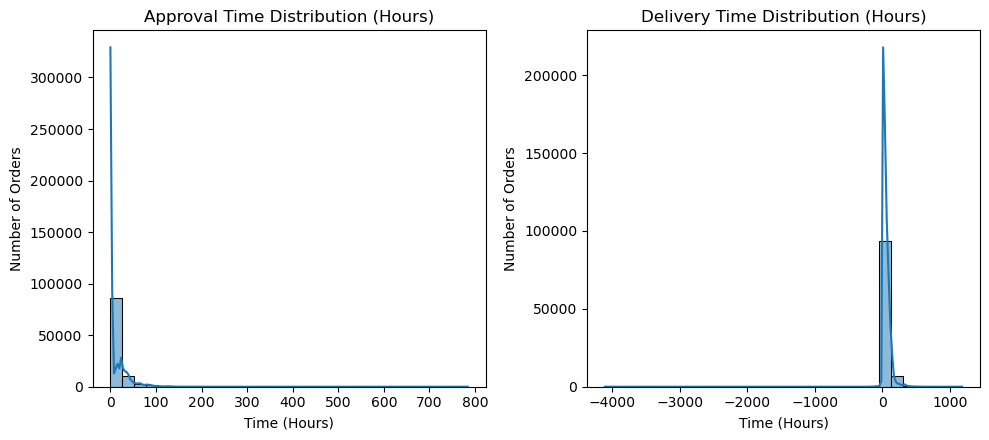

In [256]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(10, 4.5))

sns.histplot(shipping_df['approval_time'].dt.total_seconds() / 3600, kde=True, bins=30, ax=axes[0])  # 결제 승인 소요 시간: 주문완료 시간 -> 승인 시간
axes[0].set_title('Approval Time Distribution (Hours)')
axes[0].set_xlabel('Time (Hours)')
axes[0].set_ylabel('Number of Orders')

sns.histplot(shipping_df['delivery_time'].dt.total_seconds() / 3600, kde=True, bins=30, ax=axes[1]) # 물류 전달 소요 시간: 승인 시간 -> 물류 전달 시간
axes[1].set_title('Delivery Time Distribution (Hours)')
axes[1].set_xlabel('Time (Hours)')
axes[1].set_ylabel('Number of Orders')

# 서브플롯 간 간격 조정
plt.tight_layout()

# 플롯 표시
plt.show()

In [264]:
shipping_df.head(1)

,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,shipping_limit_date,approval_time,delivery_time,shipping_time,delayed_delivery,order_purchase_hour
0,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-06 11:07:15,0 days 00:10:42,2 days 08:47:45,1 days 15:12:15,False,10


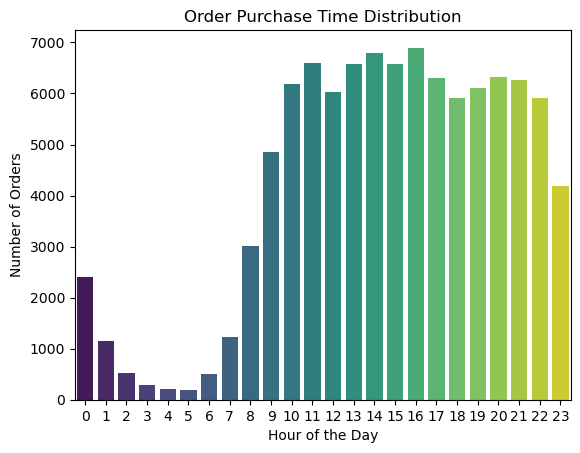

In [265]:
# 주문 발생 시간 분포 분석
shipping_df['order_purchase_timestamp'].dt.hour

sns.countplot(data=shipping_df, x='order_purchase_hour', palette='viridis')
plt.title('Order Purchase Time Distribution')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Orders')
plt.show()